## Imports

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Data setup

In [4]:
PATH = "data/breakfast/"

In [5]:
sz=224

### Look at pictures

In [6]:
!ls {PATH}

train  valid


In [7]:
!ls {PATH}valid

frenchtoast  pancake  waffle


In [8]:
files = !ls {PATH}valid/frenchtoast | head
files

['images 34.jpg',
 'images 35.jpg',
 'images 36.jpg',
 'images 37.jpg',
 'images 38.jpg',
 'images 39.jpg',
 'images 40.jpg',
 'images 41.jpg',
 'images 42.jpg',
 'images 43.jpg']

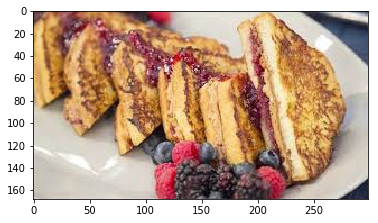

In [9]:
img = plt.imread(f'{PATH}valid/frenchtoast/{files[0]}')
plt.imshow(img);

In [10]:
img.shape

(168, 299, 3)

## Model

In [13]:
!rm -rf {PATH}tmp

In [14]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 3/3 [00:00<00:00,  3.77it/s]


going to try to find an optimal learning rate using Cyclical Learning Rates

In [15]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       1.49317  0.85139  0.60417]                   



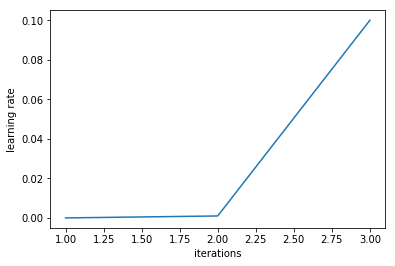

In [16]:
learn.sched.plot_lr()

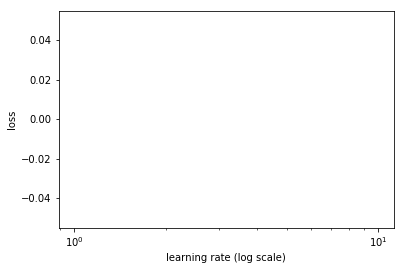

In [17]:
learn.sched.plot()

I don't get any useful output for learning rates. Maybe I need to add more images for this to work properly

### Fit Model to the data

I choose to use a learnign rate of .001 because it worked better than .01 - not because it worked with the auto learning rate finder

In [18]:
learn.fit(0.001, 25)

HBox(children=(IntProgress(value=0, description='Epoch', max=25), HTML(value='')))

[ 0.       1.82306  1.37227  0.21733]           
[ 1.       1.58879  1.22978  0.29877]           
[ 2.       1.46226  1.12407  0.366  ]           
[ 3.       1.37351  1.02515  0.42329]           
[ 4.       1.29622  0.91822  0.52651]                   
[ 5.       1.21292  0.8255   0.67519]           
[ 6.       1.14808  0.74293  0.71117]           
[ 7.       1.0947   0.67511  0.76752]           
[ 8.       1.04568  0.61595  0.79403]           
[ 9.       1.00254  0.57458  0.79924]           
[ 10.        0.96141   0.53701   0.79403]        
[ 11.        0.91386   0.50633   0.80445]        
[ 12.        0.86335   0.48639   0.80966]        
[ 13.        0.81696   0.46512   0.81487]        
[ 14.        0.7806    0.45194   0.81487]        
[ 15.        0.74139   0.4399    0.82008]        
[ 16.        0.70831   0.43047   0.83049]        
[ 17.        0.68318   0.41792   0.8357 ]        
[ 18.        0.66167   0.40646   0.84091]        
[ 19.        0.63516   0.40354   0.84612]        
[ 

## Predictions

In [19]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
data.classes

['frenchtoast', 'pancake', 'waffle']

In [21]:
log_preds = learn.predict()
log_preds.shape

(150, 3)

In [22]:
log_preds[:10]

array([[-0.02435, -4.0483 , -5.02006],
       [-0.08749, -2.77787, -3.83502],
       [-0.06926, -4.39451, -2.90817],
       [-0.15745, -3.42657, -2.17879],
       [-0.57443, -1.01075, -2.61687],
       [-0.08519, -3.74171, -2.84817],
       [-0.04438, -3.66895, -4.02247],
       [-0.11566, -2.31653, -4.54612],
       [-0.14156, -2.32135, -3.38556],
       [-0.72766, -1.84511, -1.02456]], dtype=float32)

In [23]:
preds = np.argmax(log_preds, axis=1)

In [24]:
preds[:3]

array([0, 0, 0])

In [25]:
probs = np.exp(log_preds)

### Visualize some predictions

In [26]:
imr = ImageModelResults(data.val_ds, log_preds)

### Most correct frenchtoast

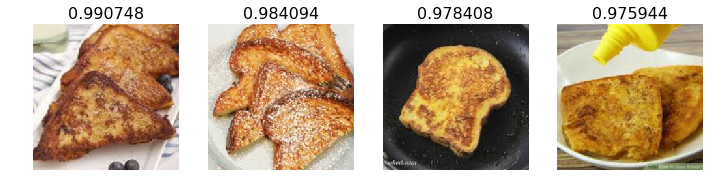

In [27]:
imr.plot_most_correct(0)

### Most correct pancakes

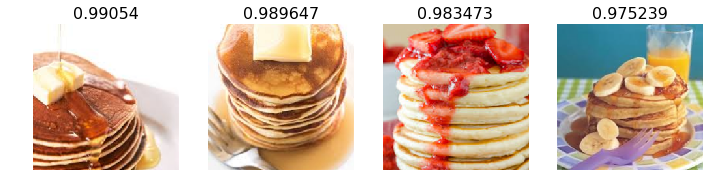

In [28]:
imr.plot_most_correct(1)

### Most correct waffles

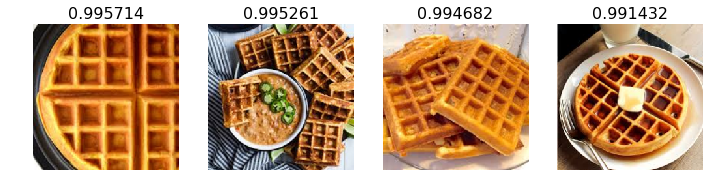

In [29]:
imr.plot_most_correct(2)

### Most incorrect frenchtoast
These look like good frenchtoast to me. At least the probabilities seem to be pretty high even though they were ultimately misclassified.

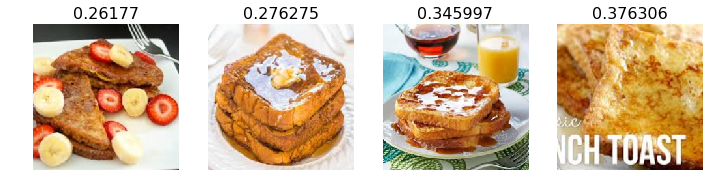

In [30]:
imr.plot_most_incorrect(0)

### Most incorrect pancakes
These all look like perfectly good pancakes to me. I wonder what went wrong.

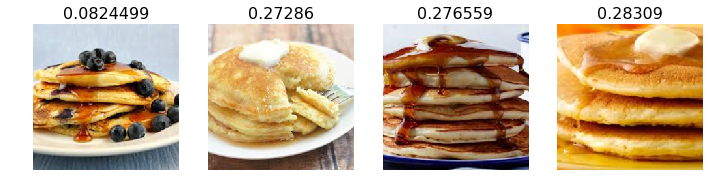

In [31]:
imr.plot_most_incorrect(1)

### Most incorrect waffles
A few of these are somewhat understandable due to stuffing, chicken. However, all things considered I can tell that these are all waffles

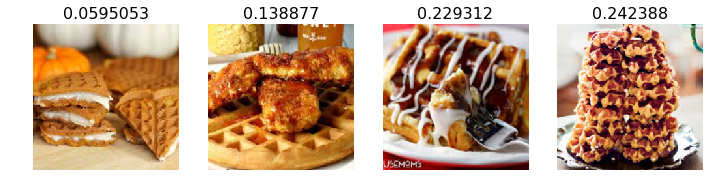

In [32]:
imr.plot_most_incorrect(2)